In [1]:
%pylab inline
#% config InlineBackend.figure_format = 'svg'

import pandas as pd
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

Populating the interactive namespace from numpy and matplotlib


In [2]:
#DF that was created with all product info
product_df = pd.read_csv("FINALP_df.csv")
product_df.head(3)

,Name,Brand,Price,No_reviews,Hearts,Size,PC,Ingredients_y,AHA,HA,...,LVMH,Loreal,Mark_Veder,PE,PG,Puig,SCJ,Shiseido,SpaceNK,Unilever
0,Protini™ Polypeptide Moisturizer,Drunk Elephant,68.0,4000,266164,1.69,Shiseido,HA,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,The Water Cream,Tatcha,68.0,3000,240692,1.70,Unilever,NaN,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Crème de la Mer Moisturizer,La Mer,180.0,667,75353,1.70,Estee_Lauder,NaN,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
prod_df = product_df

In [4]:
prod_df = product_df.drop(prod_df.index[291:305])

In [5]:
prod_df.tail(2)

,Name,Brand,Price,No_reviews,Hearts,Size,PC,Ingredients_y,AHA,HA,...,LVMH,Loreal,Mark_Veder,PE,PG,Puig,SCJ,Shiseido,SpaceNK,Unilever
289,Visionnaire Advanced Multi-Correcting Cream,Lancôme,90.0,35,4281,1.70,Loreal,HA,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
290,Hydrating Moisturizer for Dry Skin,KORA Organics,48.0,24,3043,1.69,Independent,HA,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#Create new column with price/oz of product to make a more comporable target across the dataframe
prod_df['Price_per_OZ'] = product_df['Price']/product_df['Size']
prod_df.head(1)

,Name,Brand,Price,No_reviews,Hearts,Size,PC,Ingredients_y,AHA,HA,...,Loreal,Mark_Veder,PE,PG,Puig,SCJ,Shiseido,SpaceNK,Unilever,Price_per_OZ
0,Protini™ Polypeptide Moisturizer,Drunk Elephant,68.0,4000,266164,1.69,Shiseido,HA,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,40.236685


### Correlation

In [91]:
prod_df.corr()

,Price,No_reviews,Hearts,Size,AHA,HA,AMOREPACIFIC,Clarins,Coty,Edgewell,...,Loreal,Mark_Veder,PE,PG,Puig,SCJ,Shiseido,SpaceNK,Unilever,Price_per_OZ
Price,1.000000,-0.193673,-0.177592,0.067823,0.032486,-0.088621,-0.038938,0.160826,0.070904,-0.055274,...,-0.038349,-0.038231,0.129533,-0.031114,-0.035639,0.001179,0.017697,-0.051897,-0.060638,0.951940
No_reviews,-0.193673,1.000000,0.715189,-0.030905,0.069687,-0.112029,-0.060738,-0.025668,-0.031715,0.047531,...,-0.042788,0.032772,-0.052977,0.140084,0.021876,-0.027632,0.025381,-0.033918,-0.038824,-0.192724
Hearts,-0.177592,0.715189,1.000000,-0.024139,-0.024023,-0.061063,-0.068545,-0.065501,-0.025150,0.085257,...,-0.055999,0.048265,-0.040611,0.116115,-0.015331,-0.028860,0.124198,-0.030163,0.010147,-0.174843
Size,0.067823,-0.030905,-0.024139,1.000000,0.028999,0.031632,0.014611,-0.056094,-0.055359,-0.001588,...,-0.106874,-0.001588,0.099306,0.029291,-0.003193,-0.001588,0.051652,0.086220,-0.058738,-0.160259
AHA,0.032486,0.069687,-0.024023,0.028999,1.000000,-0.280683,0.084388,-0.048273,0.032459,-0.019537,...,-0.051748,-0.019537,0.078442,-0.062762,-0.039277,-0.019537,-0.080249,-0.027677,0.025737,0.030940
HA,-0.088621,-0.112029,-0.061063,0.031632,-0.280683,1.000000,0.028721,-0.073346,-0.024280,-0.049542,...,0.048852,0.069604,-0.056647,-0.006050,0.080050,-0.049542,0.071792,-0.070183,-0.015868,-0.091644
AMOREPACIFIC,-0.038938,-0.060738,-0.068545,0.014611,0.084388,0.028721,1.000000,-0.024395,-0.024395,-0.009873,...,-0.048082,-0.009873,-0.048082,-0.031717,-0.019849,-0.009873,-0.040555,-0.013987,-0.060131,-0.048245
Clarins,0.160826,-0.025668,-0.065501,-0.056094,-0.048273,-0.073346,-0.024395,1.000000,-0.021053,-0.008520,...,-0.041494,-0.008520,-0.041494,-0.027372,-0.017129,-0.008520,-0.034998,-0.012070,-0.051892,0.186994
Coty,0.070904,-0.031715,-0.025150,-0.055359,0.032459,-0.024280,-0.024395,-0.021053,1.000000,-0.008520,...,-0.041494,-0.008520,-0.041494,-0.027372,-0.017129,-0.008520,-0.034998,-0.012070,-0.051892,0.086639
Edgewell,-0.055274,0.047531,0.085257,-0.001588,-0.019537,-0.049542,-0.009873,-0.008520,-0.008520,1.000000,...,-0.016793,-0.003448,-0.016793,-0.011078,-0.006933,-0.003448,-0.014164,-0.004885,-0.021001,-0.056310


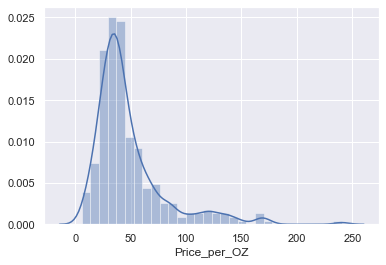

In [93]:
sns.distplot(prod_df['Price_per_OZ'])

### Baseline Model & OLS Regression Summary

In [7]:
PCIG_df = prod_df[['Price_per_OZ', 'No_reviews', 'Hearts', 'Size','AHA', 'HA','AMOREPACIFIC', 'Clarins',
                    'Coty','Edgewell', 'Estee_Lauder', 'Independent', 'Kose', 'LG', 'LVMH',
                    'Loreal', 'Mark_Veder', 'PE', 'PG', 'Puig', 'SCJ', 'Shiseido', 'SpaceNK', 'Unilever']]

In [8]:
PCIG = PCIG_df.select_dtypes(exclude=['object']).copy()

In [95]:
#Take out SCJ and Puig because dummy variables
X = PCIG_df.loc[:,['No_reviews', 'Hearts', 'Size','AHA', 'HA','AMOREPACIFIC', 'Clarins',
                    'Coty','Edgewell', 'Estee_Lauder', 'Independent', 'Kose', 'LG', 'LVMH',
                    'Loreal', 'Mark_Veder', 'PE', 'PG', 'Shiseido', 'SpaceNK', 'Unilever']]

y = PCIG_df['Price_per_OZ']

In [96]:
model = sm.OLS(y,sm.add_constant(X))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Price_per_OZ   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     2.205
Date:                Fri, 17 Jul 2020   Prob (F-statistic):            0.00220
Time:                        07:25:12   Log-Likelihood:                -1404.0
No. Observations:                 291   AIC:                             2852.
Df Residuals:                     269   BIC:                             2933.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           76.2806     17.289      4.412      0.000      42.242     110.319
No_reviews      -0.0061      0.004     -1.750      0.081      -0.013       0.001
Hearts       -6.402e-05   8.18e-05     -0.783      0.435      -0.000     9.7e-05
Size           -17.1242      5.762     -2.972      0.003     -28.469      -5.779
AHA              2.2482      6.563      0.343      0.732     -10.674      15.170
HA              -6.7161      4.065     -1.652      0.100     -14.719       1.287
AMOREPACIFIC    -3.9004     17.965     -0.217      0.828     -39.271      31.470
Clarins         43.9434     19.082      2.303      0.022       6.375      81.511
Coty            22.5444     19.060      1.183      0.238     -14.982      60.071
Edgewell       -19.7560     34.568     -0.572      0.568     -87.814      48.302
Estee_Lauder    13.4738     14.914      0.903      0.367     -15.889      42.836
Independent      3.9430     14.460      0.273      0.785     -24.527      32.413
Kose            -4.5733     22.976     -0.199      0.842     -49.808      40.662
LG              -0.4549     34.377     -0.013      0.989     -68.136      67.226
LVMH             5.0452     15.465      0.326      0.745     -25.403      35.494
Loreal           3.7717     15.560      0.242      0.809     -26.864      34.407
Mark_Veder      -6.1587     34.439     -0.179      0.858     -73.963      61.646
PE              20.5041     15.635      1.311      0.191     -10.279      51.287
PG               4.1539     17.257      0.241      0.810     -29.822      38.130
Shiseido        10.1870     16.172      0.630      0.529     -21.652      42.026
SpaceNK        -15.6640     26.442     -0.592      0.554     -67.724      36.396
Unilever         2.3518     15.114      0.156      0.876     -27.405      32.109
==============================================================================
Omnibus:                      143.149   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              703.309
Skew:                           2.045   Prob(JB):                    1.90e-153
Kurtosis:                       9.424   Cond. No.                     1.24e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Residual')

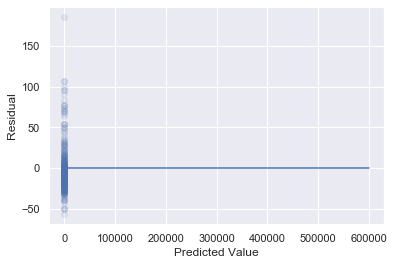

In [97]:
y_pred = results.predict(sm.add_constant(X))

plt.scatter(y_pred,y-y_pred,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,0,1000))
plt.xlabel('Predicted Value')
plt.ylabel('Residual')

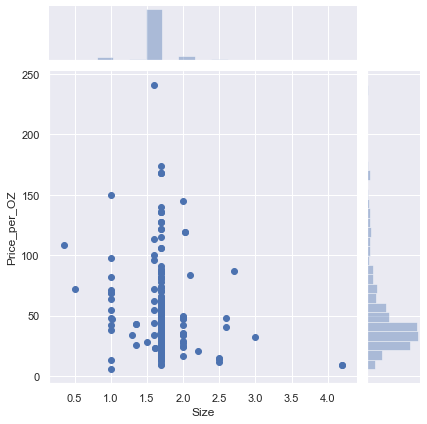

In [100]:
sns.jointplot('Size', 'Price_per_OZ', data=PCIG_df);

In [101]:
def add_square_terms(df):    

    df_poly = df.copy()
    
    for c in df.columns:
        df_poly[c + '**2'] = df[c]**2
        
    return df_poly

In [102]:
from sklearn.metrics import mean_squared_error

def RMSE(actual, predicted):
    return np.sqrt(mean_squared_error(actual,predicted))   

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=3)

lm = LinearRegression()
lm.fit(X_train, y_train)
print('OLS regression score val R^2: %.3f' % lm.score(X_val, y_val))
print('OLS regression score val RMSE: %.3f \n' % RMSE(lm.predict(X_val), y_val))

lm.fit(add_square_terms(X_train), y_train)
print('Degree 2 polynomial regression val R^2: %.3f' 
      % lm.score(add_square_terms(X_val), y_val))
print('Degree 2 polynomial regression score val RMSE: %.3f' 
      % RMSE(lm.predict(add_square_terms(X_val)), y_val))

OLS regression score val R^2: -0.613
OLS regression score val RMSE: 24.505 

Degree 2 polynomial regression val R^2: -0.334
Degree 2 polynomial regression score val RMSE: 22.288


Text(0, 0.5, 'Residual')

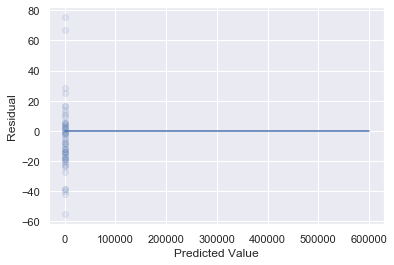

In [104]:
y_pred = lm.predict(add_square_terms(X_val))

plt.scatter(y_pred,y_val-y_pred,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,0,1000))
plt.xlabel('Predicted Value')
plt.ylabel('Residual')

In [105]:
dict(zip(add_square_terms(X_train).columns, lm.coef_))

{'No_reviews': -0.029590218280186473,
 'Hearts': -0.0001323163554223393,
 'Size': -25.37813158807603,
 'AHA': 4.097590458654356,
 'HA': -5.218828743794428,
 'AMOREPACIFIC': -11.527851016147585,
 'Clarins': 21.369493735821145,
 'Coty': 7.560669325243817,
 'Edgewell': -2.1446030462612953e-06,
 'Estee_Lauder': 4.603821744276976,
 'Independent': -0.8333923218888757,
 'Kose': 4.367981848964347,
 'LG': 1.5747043072603242,
 'LVMH': -0.3946279743659985,
 'Loreal': -2.2291488218315587,
 'Mark_Veder': -6.723125091312454e-06,
 'PE': 7.016242499930824,
 'PG': 0.5917715699756413,
 'Shiseido': -0.7938898390121998,
 'SpaceNK': -13.065248371008186,
 'Unilever': -2.6070226600239383,
 'No_reviews**2': 3.906287086671014e-06,
 'Hearts**2': 1.2290728841820136e-09,
 'Size**2': 1.4728630656486676,
 'AHA**2': 4.097570501880045,
 'HA**2': -5.218832796264391,
 'AMOREPACIFIC**2': -11.527857710532658,
 'Clarins**2': 21.369492976733277,
 'Coty**2': 7.5606696760828225,
 'Edgewell**2': 0.0,
 'Estee_Lauder**2': 4.603

In [107]:
from sklearn.preprocessing import PolynomialFeatures

interactions = PolynomialFeatures(degree=2, interaction_only=True)

lm.fit(interactions.fit_transform(X_train), y_train)
print('OLS regression with interaction terms val R^2: %.3f' % lm.score(interactions.transform(X_val), y_val))
print('OLS regression with interaction terms val RMSE: %.3f' 
      % RMSE(lm.predict(interactions.fit_transform(X_val)), y_val))

OLS regression with interaction terms val R^2: -14.070
OLS regression with interaction terms val RMSE: 74.906


In [108]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf = RandomForestRegressor(n_estimators=1800, max_features=3)
rf.fit(X_train, y_train)
rf.score(X_val, y_val)

-0.24005558979047278

In [109]:
RMSE(rf.predict(X_val),y_val)

21.487150597646206

In [10]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [110]:
gbm = GradientBoostingRegressor(n_estimators=1600, max_depth=3, learning_rate=.01)
gbm.fit(X_train, y_train)
gbm.score(X_val, y_val)

-0.37387303537794403

In [111]:
RMSE(gbm.predict(X_val),y_val)

22.61682045834289

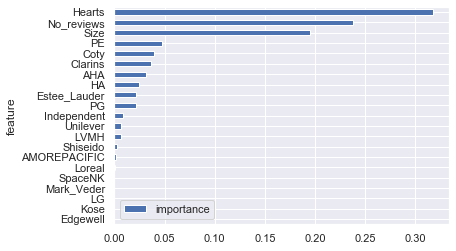

In [11]:
X_train.columns

Index(['No_reviews', 'Hearts', 'Size', 'AHA', 'HA', 'AMOREPACIFIC', 'Clarins',
       'Coty', 'Edgewell', 'Estee_Lauder', 'Independent', 'Kose', 'LG', 'LVMH',
       'Loreal', 'Mark_Veder', 'PE', 'PG', 'Puig', 'SCJ', 'Shiseido',
       'SpaceNK', 'Unilever'],
      dtype='object')

In [12]:
X_train.shape

(174, 23)

In [13]:
X_val.shape

(58, 23)

In [14]:
X_test.shape

(59, 23)

In [15]:
selected_columns = ['No_reviews', 'Hearts', 'Size', 'AHA', 'HA', 'AMOREPACIFIC', 'Clarins', 
                    'Coty', 'Edgewell', 'Estee_Lauder', 'Independent', 'Kose', 'LG', 'LVMH', 
                    'Loreal', 'Mark_Veder', 'PE', 'PG', 'Puig', 'SCJ', 'Shiseido', 
                    'SpaceNK', 'Unilever']

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 287 to 164
Data columns (total 23 columns):
No_reviews      174 non-null int64
Hearts          174 non-null int64
Size            174 non-null float64
AHA             174 non-null int64
HA              174 non-null int64
AMOREPACIFIC    174 non-null float64
Clarins         174 non-null float64
Coty            174 non-null float64
Edgewell        174 non-null float64
Estee_Lauder    174 non-null float64
Independent     174 non-null float64
Kose            174 non-null float64
LG              174 non-null float64
LVMH            174 non-null float64
Loreal          174 non-null float64
Mark_Veder      174 non-null float64
PE              174 non-null float64
PG              174 non-null float64
Puig            174 non-null float64
SCJ             174 non-null float64
Shiseido        174 non-null float64
SpaceNK         174 non-null float64
Unilever        174 non-null float64
dtypes: float64(19), int64(4)
memory usage: 32.6 K

In [17]:
lasso_model = Lasso(alpha = 1) 
lasso_model.fit(X_train.loc[:,selected_columns], y_train) #alpha is pythons lambda

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [18]:
list(zip(selected_columns, lasso_model.coef_))

[('No_reviews', -0.008959387350609051),
 ('Hearts', 1.2035777898630225e-05),
 ('Size', -4.545750954832162),
 ('AHA', -0.0),
 ('HA', -7.090686658887938),
 ('AMOREPACIFIC', -0.0),
 ('Clarins', 0.0),
 ('Coty', 0.0),
 ('Edgewell', 0.0),
 ('Estee_Lauder', 0.0),
 ('Independent', -4.649969141950212),
 ('Kose', -0.0),
 ('LG', -0.0),
 ('LVMH', -0.0),
 ('Loreal', -0.0),
 ('Mark_Veder', -0.0),
 ('PE', 0.0),
 ('PG', -0.0),
 ('Puig', -0.0),
 ('SCJ', 0.0),
 ('Shiseido', -0.0),
 ('SpaceNK', -0.0),
 ('Unilever', -0.0)]

In [52]:
X_train_collinear = X_train.loc[:,selected_columns]
X_train_collinear.corr() 

,No_reviews,Hearts,Size,AHA,HA,AMOREPACIFIC,Clarins,Coty,Edgewell,Estee_Lauder,...,LVMH,Loreal,Mark_Veder,PE,PG,Puig,SCJ,Shiseido,SpaceNK,Unilever
No_reviews,1.000000,0.693412,-0.058875,0.203820,-0.065250,-0.057323,-0.022391,-0.057370,NaN,-0.004705,...,0.084014,-0.006481,0.045253,-0.096773,-0.002665,0.012368,NaN,0.043883,-0.050953,-0.011391
Hearts,0.693412,1.000000,-0.037553,-0.005441,0.024703,-0.064438,-0.070299,-0.042815,NaN,0.067345,...,0.095383,-0.012251,0.059314,-0.100908,0.014331,-0.039748,NaN,0.119415,-0.039971,0.078634
Size,-0.058875,-0.037553,1.000000,-0.006351,0.057567,0.031349,-0.074843,-0.000167,NaN,0.103703,...,-0.006563,-0.149250,-0.000096,0.156616,0.028079,-0.000136,NaN,-0.002270,0.103341,-0.102526
AHA,0.203820,-0.005441,-0.006351,1.000000,-0.253173,-0.043588,-0.043588,-0.037638,NaN,-0.054079,...,-0.087278,-0.073818,-0.021604,0.157026,-0.048877,-0.030641,NaN,-0.073818,-0.030641,-0.038176
HA,-0.065250,0.024703,0.057567,-0.253173,1.000000,0.017749,-0.059459,0.059772,NaN,0.129866,...,0.014927,0.101380,0.085333,-0.093392,0.054533,0.012477,NaN,0.101380,-0.096075,-0.045930
AMOREPACIFIC,-0.057323,-0.064438,0.031349,-0.043588,0.017749,1.000000,-0.023529,-0.020317,NaN,-0.062832,...,-0.047114,-0.039848,-0.011662,-0.045374,-0.026384,-0.016541,NaN,-0.039848,-0.016541,-0.056829
Clarins,-0.022391,-0.070299,-0.074843,-0.043588,-0.059459,-0.023529,1.000000,-0.020317,NaN,-0.062832,...,-0.047114,-0.039848,-0.011662,-0.045374,-0.026384,-0.016541,NaN,-0.039848,-0.016541,-0.056829
Coty,-0.057370,-0.042815,-0.000167,-0.037638,0.059772,-0.020317,-0.020317,1.000000,NaN,-0.054255,...,-0.040683,-0.034408,-0.010070,-0.039180,-0.022783,-0.014283,NaN,-0.034408,-0.014283,-0.049071
Edgewell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Estee_Lauder,-0.004705,0.067345,0.103703,-0.054079,0.129866,-0.062832,-0.062832,-0.054255,NaN,1.000000,...,-0.125813,-0.106409,-0.031143,-0.121166,-0.070456,-0.044170,NaN,-0.106409,-0.044170,-0.151754


In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

model = sm.OLS(y_train, sm.add_constant(X_train_collinear))
results = model.fit()

results.summary()

/Users/krystynametcalf/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Price_per_OZ   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     2.216
Date:                Fri, 17 Jul 2020   Prob (F-statistic):            0.00358
Time:                        05:19:51   Log-Likelihood:                -811.60
No. Observations:                 174   AIC:                             1665.
Df Residuals:                     153   BIC:                             1732.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           73.1911     10.527      6.952      0.000      52.393      93.989
No_reviews      -0.0071      0.005     -1.560      0.121      -0.016       0.002
Hearts        1.847e-06   9.01e-05      0.020      0.984      -0.000       0.000
Size           -13.2685      5.956     -2.228      0.027     -25.035      -1.502
AHA             -8.1057      8.803     -0.921      0.359     -25.497       9.286
HA             -12.1399      4.519     -2.687      0.008     -21.067      -3.213
AMOREPACIFIC     1.6237     13.467      0.121      0.904     -24.982      28.229
Clarins         37.6583     13.477      2.794      0.006      11.034      64.283
Coty            45.1250     15.388      2.932      0.004      14.725      75.526
Edgewell      1.073e-14   8.43e-15      1.272      0.205   -5.93e-15    2.74e-14
Estee_Lauder    13.5873      6.553      2.074      0.040       0.642      26.533
Independent     -2.2102      5.285     -0.418      0.676     -12.652       8.231
Kose           -14.1658     26.853     -0.528      0.599     -67.217      38.885
LG               0.9308     26.114      0.036      0.972     -50.660      52.522
LVMH             0.5781      7.692      0.075      0.940     -14.618      15.774
Loreal          -4.8206      8.691     -0.555      0.580     -21.990      12.349
Mark_Veder      -6.4205     26.166     -0.245      0.806     -58.114      45.273
PE              16.8985      8.294      2.037      0.043       0.513      33.284
PG               6.4685     12.160      0.532      0.596     -17.554      30.491
Puig            -7.4321     18.613     -0.399      0.690     -44.203      29.339
SCJ           4.065e-16   1.56e-15      0.260      0.795   -2.68e-15     3.5e-15
Shiseido         2.5230      8.768      0.288      0.774     -14.799      19.844
SpaceNK        -20.7866     18.932     -1.098      0.274     -58.188      16.615
Unilever         3.6339      6.860      0.530      0.597      -9.918      17.186
==============================================================================
Omnibus:                       69.368   Durbin-Watson:                   2.296
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.536
Skew:                           1.651   Prob(JB):                     6.35e-45
Kurtosis:                       7.144   Cond. No.                     1.10e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.15e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [53]:
lr_model_ridge = Ridge(alpha = 10)
lr_model_ridge.fit(X_train_collinear, y_train)

list(zip(X_train_collinear.columns, lr_model_ridge.coef_))

[('No_reviews', -0.008372109199912459),
 ('Hearts', 8.092504768082956e-06),
 ('Size', -9.291123297452758),
 ('AHA', -2.955250426131766),
 ('HA', -9.28064359166971),
 ('AMOREPACIFIC', -1.3261050605337377),
 ('Clarins', 9.522831211031749),
 ('Coty', 8.909177781672803),
 ('Edgewell', 0.0),
 ('Estee_Lauder', 4.977091542475729),
 ('Independent', -6.83101102032228),
 ('Kose', -1.4568991790942474),
 ('LG', -0.5400247568541008),
 ('LVMH', -2.894918588505499),
 ('Loreal', -5.292825449168354),
 ('Mark_Veder', -1.1983511162182823),
 ('PE', 5.656499092103876),
 ('PG', 0.06641836081810461),
 ('Puig', -2.160127748311131),
 ('SCJ', 0.0),
 ('Shiseido', -1.8393333012540463),
 ('SpaceNK', -4.469536405566926),
 ('Unilever', -1.122885362273575)]

In [55]:
lr_model_lasso = Lasso(alpha = 1)
lr_model_lasso.fit(X_train_collinear, y_train)

list(zip(X_train_collinear.columns, lr_model_lasso.coef_))

[('No_reviews', -0.008959387350609051),
 ('Hearts', 1.2035777898630225e-05),
 ('Size', -4.545750954832162),
 ('AHA', -0.0),
 ('HA', -7.090686658887938),
 ('AMOREPACIFIC', -0.0),
 ('Clarins', 0.0),
 ('Coty', 0.0),
 ('Edgewell', 0.0),
 ('Estee_Lauder', 0.0),
 ('Independent', -4.649969141950212),
 ('Kose', -0.0),
 ('LG', -0.0),
 ('LVMH', -0.0),
 ('Loreal', -0.0),
 ('Mark_Veder', -0.0),
 ('PE', 0.0),
 ('PG', -0.0),
 ('Puig', -0.0),
 ('SCJ', 0.0),
 ('Shiseido', -0.0),
 ('SpaceNK', -0.0),
 ('Unilever', -0.0)]

In [56]:
test_set_pred = lasso_model.predict(X_test.loc[:,selected_columns])

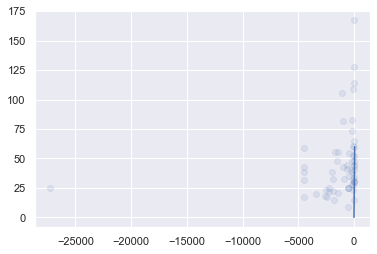

In [57]:
plt.scatter(test_set_pred, y_test, alpha=.1)
plt.plot(np.linspace(0,60,10), np.linspace(0,60,10));

In [25]:
#r-squared
r2_score(y_test, test_set_pred)

0.08911042362111987

In [26]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

mae(y_test, test_set_pred)

21.25568138508687

### Standard-Scaling Features

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [28]:
## This step fits the Standard Scaler to the training data
## Essentially it finds the mean and standard deviation of each variable in the training set

std = StandardScaler()
std.fit(X_train.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [29]:
## This step applies the scaler to the train set.
## It subtracts the mean it learned in the previous step and then divides by the standard deviation

X_tr = std.transform(X_train.values)

In [30]:
## Apply the scaler to the test set

X_te = std.transform(X_test.values)

In [31]:
## Note that even though we put a Pandas Dataframe into the scalar, what comes out is a numpy array
## In general, sklearn works on numpy.  It will accept pandas objects by trying to coerce them to numpy arrays
## But it will not usually output pandas objects

type(X_train), type(X_tr)

(pandas.core.frame.DataFrame, numpy.ndarray)

(array([161.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  13.]),
 array([-0.28415725,  0.0961763 ,  0.47650985,  0.85684339,  1.23717694,
         1.61751049,  1.99784404,  2.37817758,  2.75851113,  3.13884468,
         3.51917823]),
 <a list of 10 Patch objects>)

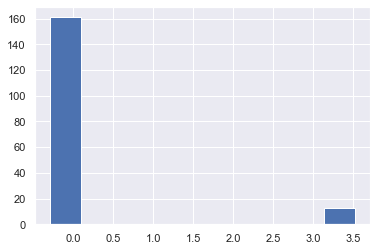

In [32]:
## Here we can plot histograms of the transformed variables
## Note that they seem to have means of 0 and stddevs of 1
## (though they are not necessarily normally distributed)

plt.hist(X_tr[:,3])

In [33]:
## Fit a LASSO model on the standardized data

lasso_model = Lasso(alpha = 10000)
lasso_model.fit(X_tr,y_train)

Lasso(alpha=10000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [34]:
## Note that now we can meaningful compare the importance of
## different features, since they're on the same scale

## But it's now difficult to interpret the coefficients
## We would need to translate back to the original feature scales by dividing
## each coefficient by the original column's standard deviation

list(zip(X_train.columns, lasso_model.coef_))

[('No_reviews', -0.0),
 ('Hearts', -0.0),
 ('Size', -0.0),
 ('AHA', -0.0),
 ('HA', -0.0),
 ('AMOREPACIFIC', -0.0),
 ('Clarins', 0.0),
 ('Coty', 0.0),
 ('Edgewell', 0.0),
 ('Estee_Lauder', 0.0),
 ('Independent', -0.0),
 ('Kose', -0.0),
 ('LG', -0.0),
 ('LVMH', -0.0),
 ('Loreal', -0.0),
 ('Mark_Veder', -0.0),
 ('PE', 0.0),
 ('PG', 0.0),
 ('Puig', -0.0),
 ('SCJ', 0.0),
 ('Shiseido', -0.0),
 ('SpaceNK', -0.0),
 ('Unilever', 0.0)]

### Tuning Regularization Strength via Validation

In [35]:
alphalist = 10**(np.linspace(-2,2,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    # note the use of a new sklearn utility: Pipeline to pack
    # multiple modeling steps into one fitting process 
    steps = [('standardize', StandardScaler()), 
             ('lasso', Lasso(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.loc[:,selected_columns].values, y_train)
    
    val_set_pred = pipe.predict(X_val.loc[:,selected_columns].values)
    err_vec_val[i] = mae(y_val, val_set_pred)

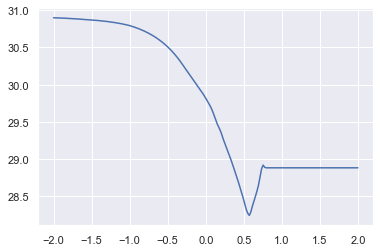

In [36]:
#plot the curve of validation error as alpha changes

plt.plot(np.log10(alphalist), err_vec_val)

In [37]:
np.min(err_vec_val)

28.24270487119224

In [38]:
## This is the value of alpha that gave us the lowest error
alphalist[np.argmin(err_vec_val)]

3.739937302478798

### Automated Regularization Strength Tuning via Cross-Validation

In [39]:
## Scale the data as before
std = StandardScaler()
std.fit(X_train.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [40]:
## Scale the Predictors on both the train and test set
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [41]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [42]:
# This is the best alpha value it found - not far from the value
# selected using simple validation
lasso_model.alpha_

0.7401959996915645

In [43]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
list(zip(X_train.columns, lasso_model.coef_))

[('No_reviews', -4.548488342689954),
 ('Hearts', -0.0),
 ('Size', -3.914406048208199),
 ('AHA', -1.1044580689446752),
 ('HA', -4.966155539980611),
 ('AMOREPACIFIC', -0.0),
 ('Clarins', 4.7261142520988395),
 ('Coty', 4.818072647343583),
 ('Edgewell', 0.0),
 ('Estee_Lauder', 3.114884699557426),
 ('Independent', -1.6702855928935698),
 ('Kose', -0.47576043793647027),
 ('LG', -0.0),
 ('LVMH', -0.0),
 ('Loreal', -0.9819740139012274),
 ('Mark_Veder', -0.01810595501065049),
 ('PE', 3.0792871776690425),
 ('PG', 0.0),
 ('Puig', -0.3136914698697892),
 ('SCJ', 0.0),
 ('Shiseido', -0.0),
 ('SpaceNK', -1.6940730927698726),
 ('Unilever', 0.0)]

In [70]:
def add_square_terms(df):    

    df_poly = df.copy()
    
    for c in df.columns:
        df_poly[c + '**2'] = df[c]**2
        
    return df_poly

In [73]:
from sklearn.metrics import mean_squared_error

def RMSE(actual, predicted):
    return np.sqrt(mean_squared_error(actual,predicted))   

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=3)

lm = LinearRegression()
lm.fit(X_train, y_train)
print('OLS regression score val R^2: %.3f' % lm.score(X_val, y_val))
print('OLS regression score val RMSE: %.3f \n' % RMSE(lm.predict(X_val), y_val))

lm.fit(add_square_terms(X_train), y_train)
print('Degree 2 polynomial regression val R^2: %.3f' 
      % lm.score(add_square_terms(X_val), y_val))
print('Degree 2 polynomial regression score val RMSE: %.3f' 
      % RMSE(lm.predict(add_square_terms(X_val)), y_val))

OLS regression score val R^2: -0.633
OLS regression score val RMSE: 24.659 

Degree 2 polynomial regression val R^2: -0.340
Degree 2 polynomial regression score val RMSE: 22.332


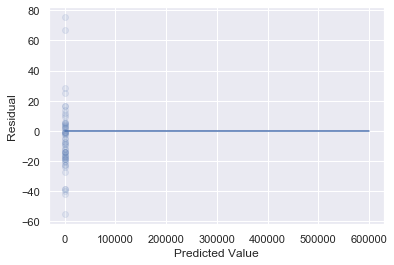

In [76]:
y_pred = lm.predict(add_square_terms(X_val))

plt.scatter(y_pred,y_val-y_pred,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,0,1000))
plt.xlabel('Predicted Value')
plt.ylabel('Residual');

AttributeError: 'DataFrame' object has no attribute 'predict'

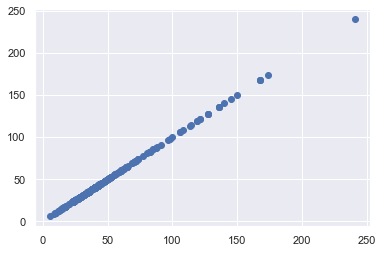

In [72]:
plt.scatter(PCIG.Price_per_OZ,y)
plt.scatter(PCIG.Price_per_OZ,PCIG.predict);

In [44]:
# Make predictions on the test set using the new model
test_set_pred = lasso_model.predict(X_te)

In [45]:
# Find the MAE and R^2 on the test set using this model
mae(y_test, test_set_pred)

20.197439002241442

### Highest R^2

In [46]:
r2_score(y_test, test_set_pred)

0.17835007584038465

In [ ]:
y_pred = results.predict(sm.add_constant(X))

plt.scatter(y_pred,y-y_pred,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,0,1000))
plt.xlabel('Predicted Value')
plt.ylabel('Residual')

### Feature Importance

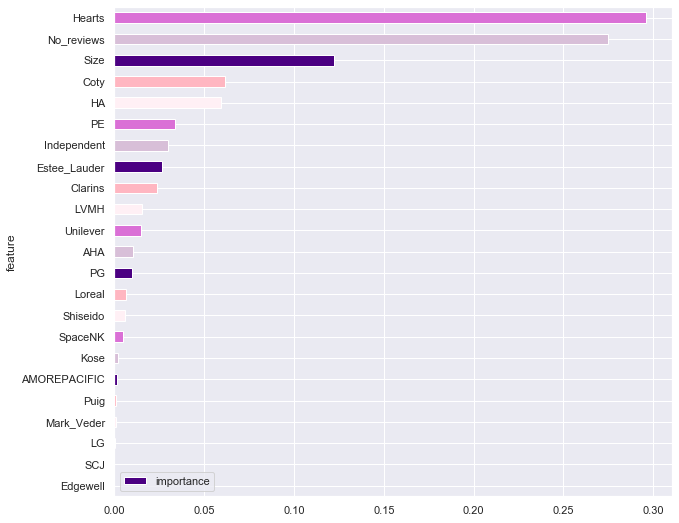

In [90]:
feat_imps = list(zip(X_train.columns,rf.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.plot(x='feature',y='importance',kind='barh', figsize = (10,9) ,color = ['indigo', 'thistle', 'orchid', 'lavenderblush', 'lightpink']);

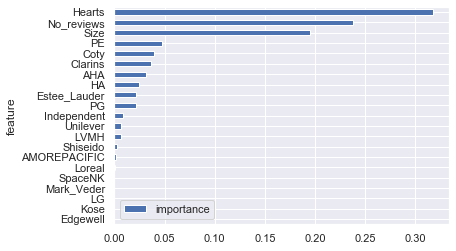

In [113]:
feat_imps = list(zip(X_train.columns,gbm.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.plot(x='feature',y='importance',kind='barh')

In [114]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression


In [117]:
features, target = ['No_reviews', 'Hearts', 'Size','AHA', 'HA','AMOREPACIFIC', 'Clarins',
             'Coty','Edgewell', 'Estee_Lauder', 'Independent', 'Kose', 'LG', 'LVMH',
             'Loreal', 'Mark_Veder', 'PE', 'PG', 'Shiseido', 'SpaceNK', 'Unilever'], ['Price_per_OZ']
 

X, y = PCIG_df[features], PCIG_df[target]

lm = LinearRegression() # construct LinearRegression model object
lm.fit(X, y) #fit model to our choice of features

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
# extract feature coefficients and intercept from fit model
print(lm.intercept_)
print(lm.coef_)

[76.28055896]
[[-6.14993475e-03 -6.40213956e-05 -1.71242101e+01  2.24824749e+00
  -6.71610206e+00 -3.90037964e+00  4.39433654e+01  2.25443645e+01
  -1.97559740e+01  1.34738468e+01  3.94296000e+00 -4.57326710e+00
  -4.54905250e-01  5.04516475e+00  3.77167180e+00 -6.15866584e+00
   2.05040764e+01  4.15386995e+00  1.01870241e+01 -1.56640475e+01
   2.35180949e+00]]


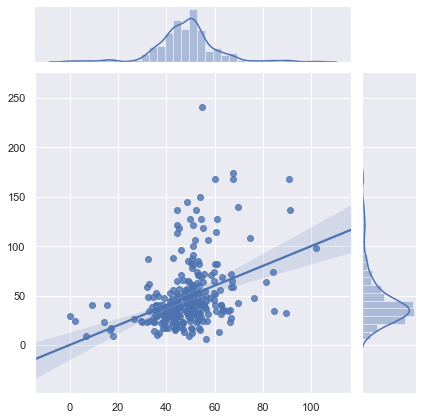

In [124]:
preds = lm.predict(X) # generate predictions (on training data) using fit model

sns.jointplot(preds,y, kind='regplot');

In [125]:
def SSE(actuals, preds):
    return np.sum((actuals - preds)**2)

SSE(y,preds)

Price_per_OZ    264245.726315
dtype: float64

In [126]:
def RMSE(actuals, preds): #root mean squared error
    return np.sqrt(np.mean((actuals - preds)**2))

RMSE(y,preds)

Price_per_OZ    30.134049
dtype: float64

In [127]:
def MAE(actuals, preds): #mean absolute error
    return np.mean(np.abs(actuals-preds))

MAE(y,preds)

Price_per_OZ    20.465862
dtype: float64

In [128]:
def SST(y):
    return np.sum((y - np.mean(y))**2)

def R2(actuals, preds):
    return 1 - SSE(actuals, preds) / SST(actuals)

R2(y,preds)

Price_per_OZ    0.146839
dtype: float64

In [129]:
lm.score(X,y)

0.14683875694618231

In [130]:
lm = LinearRegression() # construct LinearRegression model object
lm.fit(X, y) #fit model to features X, target y

lm.predict(X) # generate predictions for X using fit model
lm.score(X,y) # score predictions on X against ground truth target y, using fit model

0.14683875694618231

In [131]:
# extract feature coefficients and intercept from fit model
lm.intercept_
lm.coef_

array([[-6.14993475e-03, -6.40213956e-05, -1.71242101e+01,
         2.24824749e+00, -6.71610206e+00, -3.90037964e+00,
         4.39433654e+01,  2.25443645e+01, -1.97559740e+01,
         1.34738468e+01,  3.94296000e+00, -4.57326710e+00,
        -4.54905250e-01,  5.04516475e+00,  3.77167180e+00,
        -6.15866584e+00,  2.05040764e+01,  4.15386995e+00,
         1.01870241e+01, -1.56640475e+01,  2.35180949e+00]])

### LARS Path for Importance Feature

In [47]:
from sklearn.linear_model import lars_path

In [48]:
## Scale the variables
std = StandardScaler()
std.fit(X_train.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [49]:
X_tr = std.transform(X_train.values)

In [50]:
## Note: lars_path takes numpy matrices, not pandas dataframes

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_train.values, method='lasso')

Computing regularization path using the LARS ...


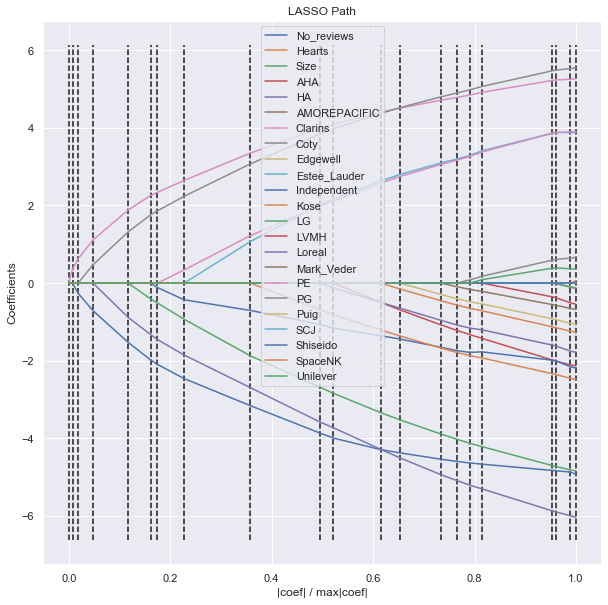

In [51]:
# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()